# Pima Indians Diabetes Database

EDA and Ensemble Model

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Data contains;

1. Pregnancies: Number of times pregnant

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3. BloodPressure: Diastolic blood pressure (mm Hg)

4. SkinThickness: Triceps skin fold thickness (mm)

5. Insulin: 2-Hour serum insulin (mu U/ml)

6. BMI: Body mass index (weight in kg/(height in m)^2)

7. DiabetesPedigreeFunction: Diabetes pedigree function

8. Age: Age (years)

Outcome: 1 if diabetes, 0 if no diabetes

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
data= pd.read_csv(r'D:\B Drive\Data Science\Practice Data\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
data.shape

(768, 9)

In [65]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [39]:
# Check for Duplicate
data.duplicated().sum()

0

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [43]:
(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

But we can observe that, there are lot of 0s present in the dataset. It is better to replace zeros with NaN and after that counting them would be easier and 0s need to be replaced with suitable values.

In [46]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,np.NaN)

In [47]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

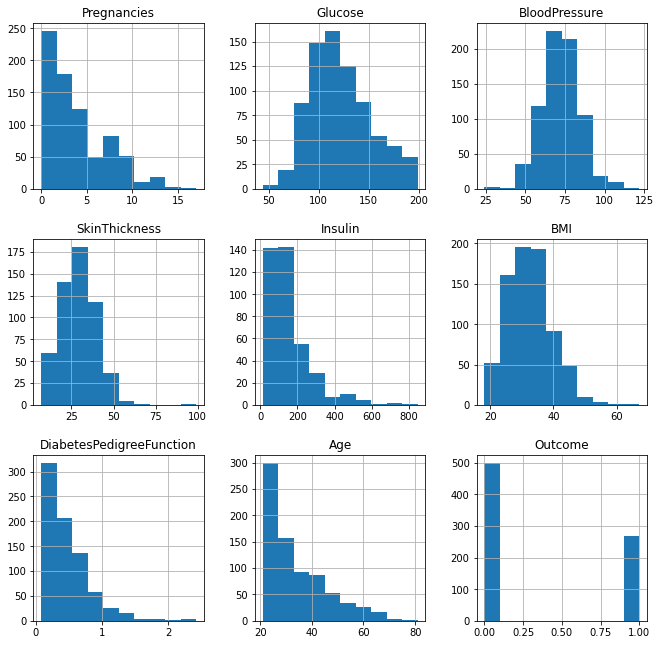

In [48]:
data.hist(figsize= (11,11))

Let's aim to replace NaN values for the columns in accordance with their distribution



In [49]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [50]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Exploratory Data Analysis

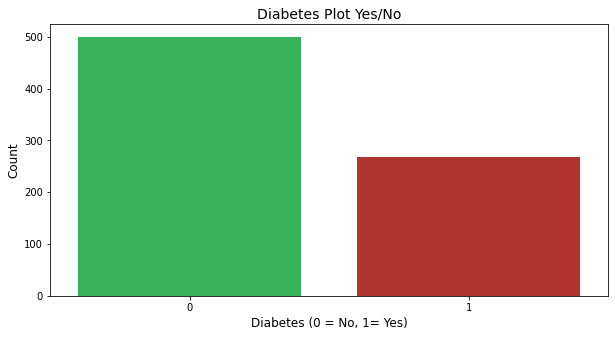

In [58]:
plt.figure(figsize=(10,5))
plt.title('Diabetes Plot Yes/No', fontsize=14)
sns.countplot(x="Outcome", data=data, palette=('#23C552','#C52219'))
plt.xlabel("Diabetes (0 = No, 1= Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From above plot, we can say that there are less number of diabetic patients in the data set.

Text(0.5, 1.0, 'Diabetes Outcome vs Age')

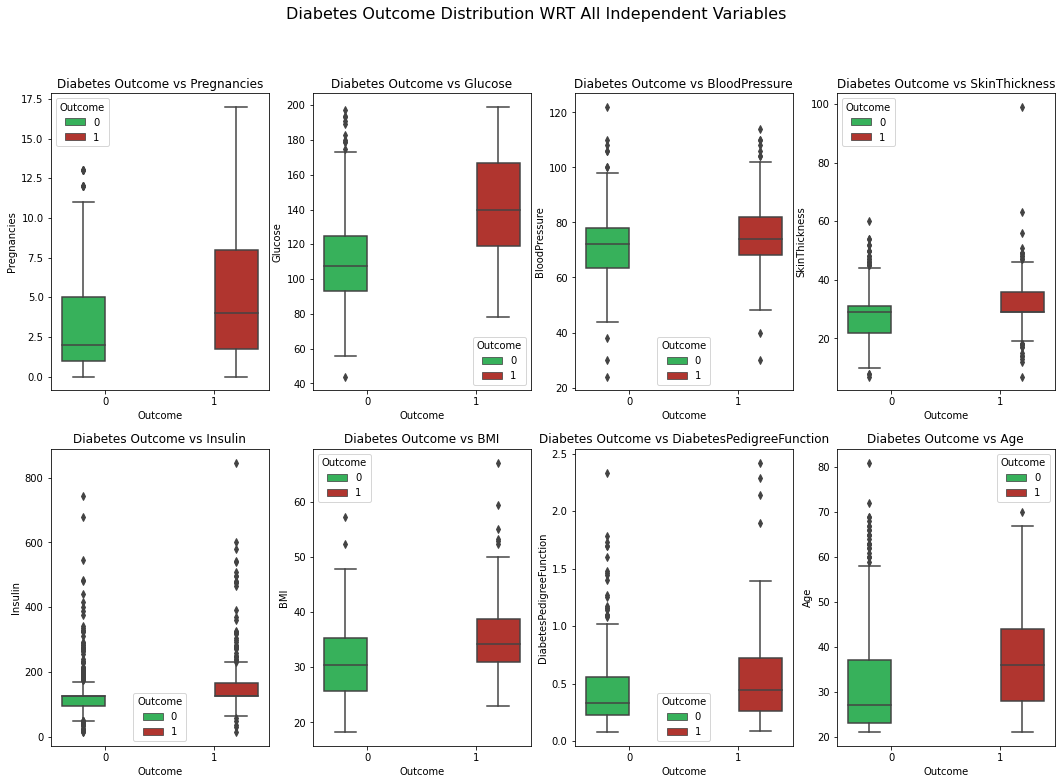

In [68]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
fig.suptitle('Diabetes Outcome Distribution WRT All Independent Variables', fontsize=16)

sns.boxplot(ax=axes[0, 0], x=data['Outcome'], y=data['Pregnancies'], hue=data['Outcome'], palette=('#23C552','#C52219'))
axes[0, 0].set_title("Diabetes Outcome vs Pregnancies", fontsize=12)

sns.boxplot(ax=axes[0, 1], x=data['Outcome'], y=data['Glucose'], hue=data['Outcome'], palette=('#23C552','#C52219'))
axes[0, 1].set_title("Diabetes Outcome vs Glucose", fontsize=12)

sns.boxplot(ax=axes[0, 2], x=data['Outcome'], y=data['BloodPressure'], hue=data['Outcome'], palette=('#23C552','#C52219'))
axes[0, 2].set_title("Diabetes Outcome vs BloodPressure", fontsize=12)

sns.boxplot(ax=axes[0, 3], x=data['Outcome'], y=data['SkinThickness'], hue=data['Outcome'], palette=('#23C552','#C52219'))
axes[0, 3].set_title("Diabetes Outcome vs SkinThickness", fontsize=12)

sns.boxplot(ax=axes[1, 0], x=data['Outcome'], y=data['Insulin'], hue=data['Outcome'], palette=('#23C552','#C52219'))
axes[1, 0].set_title("Diabetes Outcome vs Insulin", fontsize=12)

sns.boxplot(ax=axes[1, 1], x=data['Outcome'], y=data['BMI'], hue=data['Outcome'], palette=('#23C552','#C52219'))
axes[1, 1].set_title("Diabetes Outcome vs BMI", fontsize=12)

sns.boxplot(ax=axes[1, 2], x=data['Outcome'], y=data['DiabetesPedigreeFunction'], hue=data['Outcome'], palette=('#23C552','#C52219'))
axes[1, 2].set_title("Diabetes Outcome vs DiabetesPedigreeFunction", fontsize=12)

sns.boxplot(ax=axes[1, 3], x=data['Outcome'], y=data['Age'], hue=data['Outcome'], palette=('#23C552','#C52219'))
axes[1, 3].set_title("Diabetes Outcome vs Age", fontsize=12)

From above Boxplot, we can see that those who are diabetic tends to have higher Glucose levels, Age, BMI, Pregnancies and Insulin measures.

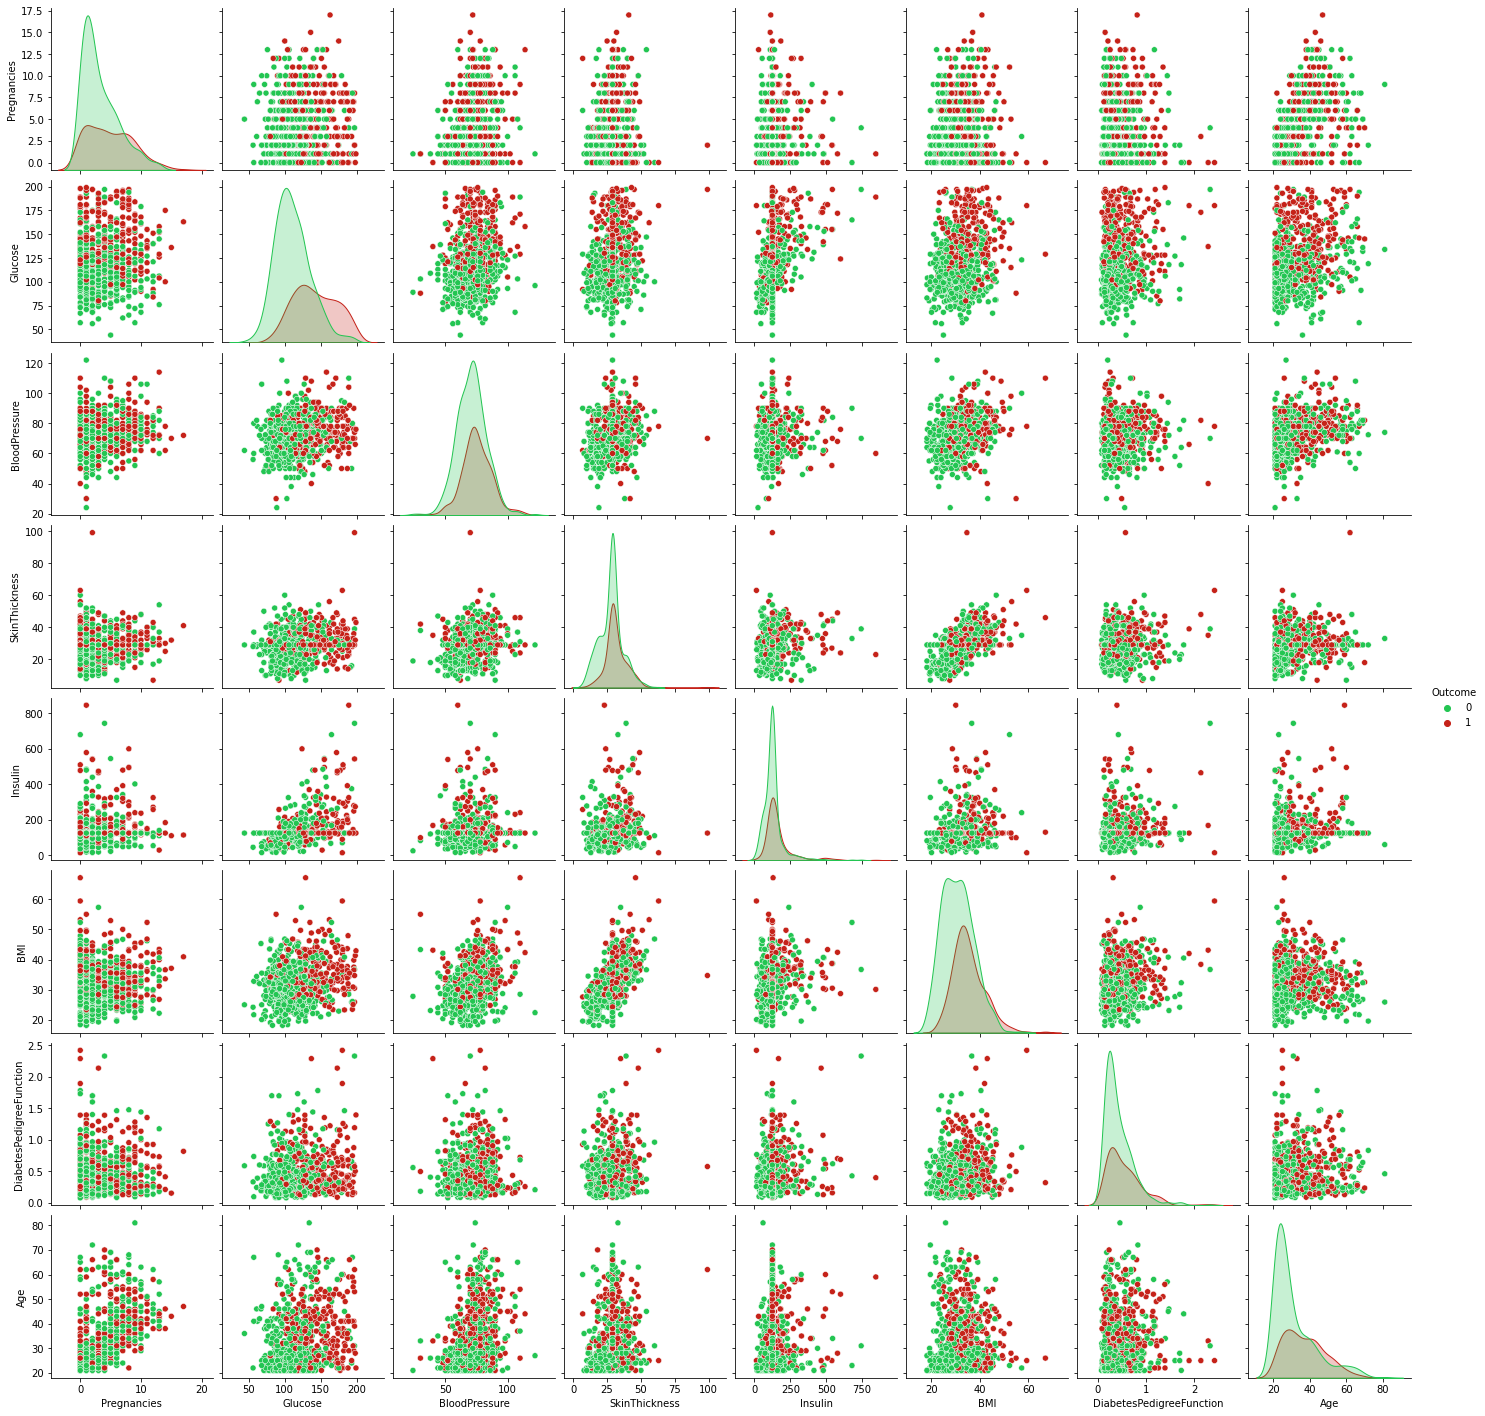

In [62]:
sns.pairplot(data, hue='Outcome', palette=('#23C552','#C52219'))


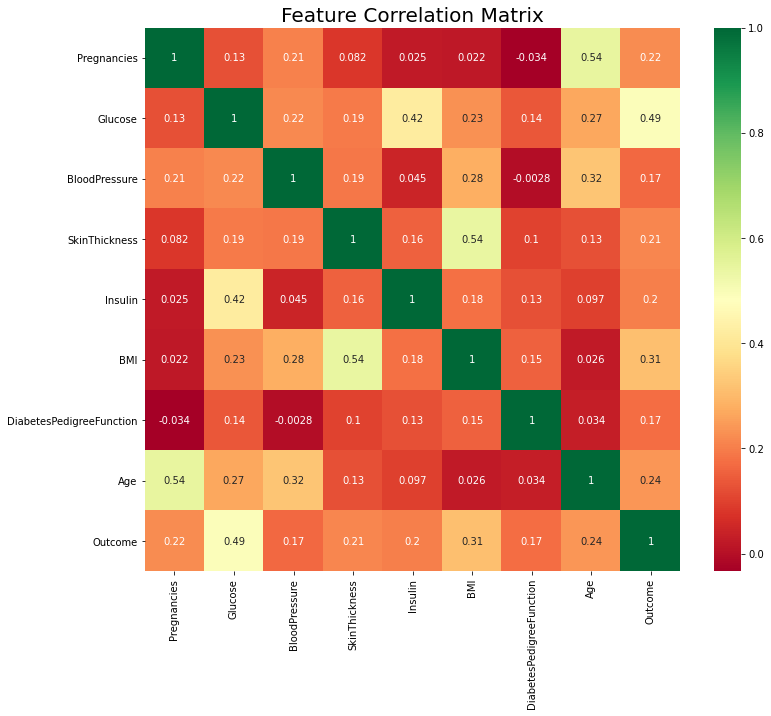

In [63]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()

We can see that a few of the features are moderately correlated - Age and number of Pregnancies, Insulin and Glucose levels, Skin Thickness and BMI - but not so much as to cause concern.

In [66]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


First Let's split the data in to x and y.

In [73]:
from sklearn.model_selection import train_test_split

x = data.drop(['Outcome'],axis=1)
y = data['Outcome']

In [75]:
from sklearn.preprocessing  import StandardScaler

sc= StandardScaler()
xsc= sc.fit_transform(x)

In [77]:
x_train, x_test, y_train,y_test= train_test_split(xsc,y, test_size= 0.3, random_state = 0)

In [78]:
x_train.shape, y_train.shape

((537, 8), (537,))

In [79]:
x_test.shape, y_test.shape

((231, 8), (231,))

# Applying Naive Bayes 

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb=  GaussianNB()

y_pred1= cl1.fit(x_train,y_train).predict(x_test)


Confusion matrix

In [99]:
from sklearn import metrics

score=  metrics.accuracy_score(y_pred1, y_test)
print('Accuracy score is', np.round(score*100,2),'%')

cm= metrics.confusion_matrix(y_pred1, y_test)
cm

Accuracy score is 76.19 %


array([[137,  35],
       [ 20,  39]], dtype=int64)

# Applying Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

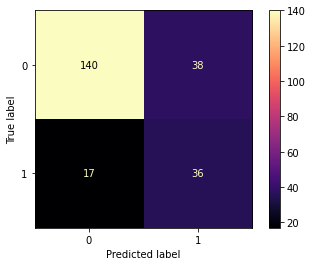

In [98]:
from sklearn import metrics
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=lr.classes_),
                              display_labels=lr.classes_)
cm.plot(cmap="magma")

In [111]:
score1=  metrics.accuracy_score(y_pred, y_test)
print('Accuracy score is', np.round(score1*100,2),'%')

Accuracy score is 77.06 %


# Applying Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
y_pred2 = random_forest.predict(x_test)

In [105]:
confmat1 = metrics.confusion_matrix(y_pred2, y_test)
confmat1

array([[138,  34],
       [ 19,  40]], dtype=int64)

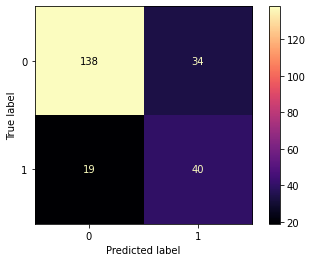

In [106]:
from sklearn import metrics
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=random_forest.classes_),
                              display_labels=random_forest.classes_)
cm.plot(cmap="magma")

In [110]:
score2=  metrics.accuracy_score(y_pred2, y_test)
print('Accuracy score is', np.round(score2*100,2),'%')


Accuracy score is 77.06 %
